In [6]:
#test file for one dimensionl problem
class Args:
    dim_in = 11 # default
    dim_out = 1 #default
    hidden_layer_size = 256 #W
    hideen_layer_num = 5 #L
    penalty_coeff = 50 #beta
    epoch = 2000 # for test
    lr = 1e-3
    turncated_num = 5 #n
    num_batch = 1000 #M
args = Args()

In [7]:
from normal_fc_model import FC_DNN
import torch
model = FC_DNN(args.dim_in,args.dim_out,args.hidden_layer_size,args.hideen_layer_num)

In [8]:
x = torch.randn(args.num_batch,1)
Z = torch.randn(args.num_batch,2,args.turncated_num)
final_input = torch.cat((x,Z.reshape(args.num_batch,2*args.turncated_num)),dim=1)
final_input.shape

torch.Size([1000, 11])

In [257]:
import torch.autograd as ag
def grad(outputs, inputs):
    '''
    求梯度的快速函数
    '''
    return ag.grad(outputs, inputs, grad_outputs=torch.ones_like(outputs), 
                   create_graph=True)

In [258]:
final_input.requires_grad = True
u = model(final_input)
u_x = grad(u,final_input)[0][:,0].unsqueeze(-1)

In [263]:
def random_field(x,n,beta,Z):
    '''
    shape of x: (num_of_sample,dim_of_features)
    shape of Z: (num_of_sample,2,n)
    '''
    coeff = torch.arange(start=1,end=n+1)
    new_x = torch.pi*coeff*x.repeat(1,n)
    part_1 = Z[:,0,:]*torch.sin(new_x)
    part_2 = Z[:,1,:]*torch.cos(new_x)
    V = torch.sum(part_1+part_2,dim=1)/torch.sqrt(torch.tensor(n))
    result = torch.exp(beta*V)
    return result.unsqueeze(-1)

In [265]:
K = random_field(x,args.turncated_num,0.1,Z)
K.shape

torch.Size([1000, 1])

In [95]:
def random_field(x,n,beta,Z):
    x = x.reshape(1,len(x))#resize the x
    coeff = torch.arange(start=1,end=n+1).reshape(n,1)
    new_x = torch.pi*coeff*x.repeat(n,1)
    part_1 = Z[:,0,:]*torch.sin(new_x)
    part_2 = Z[:,1,:]*torch.cos(new_x)
    V = torch.sum(part_1+part_2,dim=0)/torch.sqrt(torch.tensor(n))
    result = torch.exp(beta*V)
    return result

In [146]:
Z = torch.randn(10,2,args.turncated_num)
x = torch.randn(10,1)
x

tensor([[ 0.5102],
        [ 0.5339],
        [-0.8755],
        [-1.0414],
        [-0.9845],
        [ 0.4510],
        [ 2.2371],
        [ 0.3768],
        [-0.5928],
        [-2.7241]])

In [150]:
n = 5
coeff = torch.arange(start=1,end=n+1)
x.repeat(1,5)

tensor([[ 0.5102,  0.5102,  0.5102,  0.5102,  0.5102],
        [ 0.5339,  0.5339,  0.5339,  0.5339,  0.5339],
        [-0.8755, -0.8755, -0.8755, -0.8755, -0.8755],
        [-1.0414, -1.0414, -1.0414, -1.0414, -1.0414],
        [-0.9845, -0.9845, -0.9845, -0.9845, -0.9845],
        [ 0.4510,  0.4510,  0.4510,  0.4510,  0.4510],
        [ 2.2371,  2.2371,  2.2371,  2.2371,  2.2371],
        [ 0.3768,  0.3768,  0.3768,  0.3768,  0.3768],
        [-0.5928, -0.5928, -0.5928, -0.5928, -0.5928],
        [-2.7241, -2.7241, -2.7241, -2.7241, -2.7241]])

In [266]:
def Interior_1d_sampler(M,left_side,right_side):
    sampler = torch.distributions.uniform.Uniform(low=left_side,high=right_side)
    x = sampler.sample(sample_shape=(M,1))
    return x

In [267]:
Interior_1d_sampler(10,-1,1)

tensor([[ 0.4263],
        [-0.7627],
        [-0.1863],
        [-0.7705],
        [-0.2866],
        [ 0.9212],
        [-0.3783],
        [ 0.8559],
        [-0.8839],
        [-0.4087]])

In [164]:
new_x = torch.sin(torch.pi*coeff*x.repeat(1,5))
new_x.sum(dim=1)

tensor([ 1.0553,  1.1083, -0.5254,  0.3612, -0.1444,  0.5370,  2.0725, -0.1294,
        -0.7982,  0.3188])

In [274]:
def Boundary_1d_sampler(M,left_side,right_side):
    weight = torch.tensor([0.5,0.5])
    S = torch.multinomial(weight,M,replacement = True)
    S = torch.where(S==0,left_side,S)
    S = torch.where(S==1,right_side,S)
    return S

In [159]:
Z[:,0,:]*new_x

tensor([[-0.8863, -0.0104, -0.1724, -0.0777, -0.4320],
        [ 1.4040, -0.3245, -0.2142, -0.2094,  0.1316],
        [-0.7171, -0.8764,  1.4772,  2.0238, -0.3280],
        [ 0.1314,  0.1779,  0.2035, -0.2094,  0.2356],
        [-0.0625, -0.1845, -0.0212,  0.1166, -0.1152],
        [-0.1416,  0.0768,  0.7502,  0.8785, -0.0620],
        [ 0.9963,  0.7105,  0.2977, -0.3573, -1.1939],
        [-0.1172,  0.5481, -0.5409, -0.0802,  0.1519],
        [ 0.4149, -0.1710,  0.4731,  1.2270, -0.0107],
        [-0.6469, -1.2756,  1.2952,  0.2212,  0.4732]])

In [167]:
test = torch.rand(5).unsqueeze(-1)
test

tensor([[0.6538],
        [0.7394],
        [0.3368],
        [0.0008],
        [0.0088]])

In [59]:
def random_field(x,n,beta):
    Z = torch.randn(2,n,1)
    coeff = torch.arange(start=1,end=n+1).reshape(n,1)
    part_1 = Z[0,:]*torch.sin(torch.pi*coeff*x.repeat(n,1))
    part_2 = Z[1,:]*torch.cos(torch.pi*coeff*x.repeat(n,1))
    result = torch.sum(part_1+part_2,dim=0)
    result = torch.exp(beta*result)
    return part_1

In [60]:
random_field(x,args.turncated_num,0.1)

tensor([[ 0.8313,  0.6880,  0.9824],
        [-0.8981, -0.8084,  0.9313],
        [-1.0887, -1.1734, -0.7971],
        [ 0.7588,  1.2778,  0.0762],
        [ 0.0070, -0.0306,  0.0466]])

In [226]:
u = model(final_input)
final_input.requires_grad = True
grad(u,final_input)[0][:,0]

tensor([0.0474, 0.0107, 0.0424, 0.0594, 0.0493, 0.0079, 0.0251, 0.0426, 0.0594,
        0.0593], grad_fn=<SelectBackward0>)

In [28]:
import torch
import seaborn as sns
def Slice_plot(model,x,num_sample,n):
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    Z = torch.randn(num_sample,2*n)
    X = x.repeat(num_sample,1)
    input_value = torch.cat((X,Z),dim=1)
    u = model(input_value)[:,0].detach().cpu().numpy()
    plt.title('slice plot when x = {}'.format(x))
    sns.kdeplot(u)

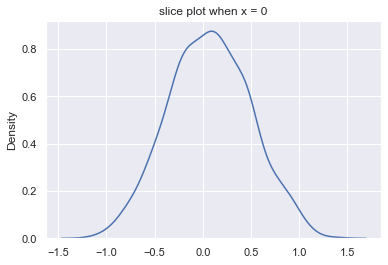

In [29]:
Slice_plot(model,torch.tensor(0),1000,5)

<AxesSubplot:ylabel='Density'>

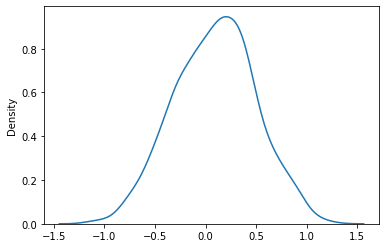

In [20]:
sns.kdeplot(u[:,0])

In [17]:
import numpy as np
def GetGaussParams_1D(num):
    if num == 1:
        X = torch.tensor([0])
        A = torch.tensor([2])
    elif num == 2:
        X = torch.tensor([np.math.sqrt(1/3), -np.math.sqrt(1/3)])
        A = torch.tensor([1, 1])
    elif num == 3:
        X = torch.tensor([np.math.sqrt(3/5), -np.math.sqrt(3/5), 0])
        A = torch.tensor([5/9, 5/9, 8/9])
    elif num == 6:
        X = torch.tensor([0.238619186081526, -0.238619186081526, 0.661209386472165, -0.661209386472165, 0.932469514199394, -0.932469514199394])
        A = torch.tensor([0.467913934574257, 0.467913934574257, 0.360761573028128, 0.360761573028128, 0.171324492415988, 0.171324492415988])
    elif num == 10:
        X = torch.tensor([0.973906528517240, -0.973906528517240, 0.433395394129334, -0.433395394129334, 0.865063366688893, -0.865063366688893, \
             0.148874338981367, -0.148874338981367, 0.679409568299053, -0.679409568299053])
        A = torch.tensor([0.066671344307672, 0.066671344307672, 0.269266719309847, 0.269266719309847, 0.149451349151147, 0.149451349151147, \
            0.295524224714896, 0.295524224714896, 0.219086362515885, 0.219086362515885])
    else:
         raise Exception(">>> Unsupported num = {} <<<".format(num))
    return X, A

def GaussIntegral_1D(func, a, b, num,Z):
    term1 = (b - a) / 2
    term2 = (a + b) / 2
    X,A = GetGaussParams_1D(num)
    term3 = func(term1 * X + term2,Z)
    term4 = torch.sum(A * term3)
    val = term1 * term4
    return val

In [4]:
import torch
def random_field(x,n,beta,Z):
    '''
    shape of x: (num_of_sample,dim_of_features)
    shape of Z: (num_of_sample,2,n)
    '''
    coeff = torch.arange(start=1,end=n+1).cuda()
    new_x = torch.pi*coeff*x.repeat(1,n)
    part_1 = Z[:,0,:]*torch.sin(new_x)
    part_2 = Z[:,1,:]*torch.cos(new_x)
    V = torch.sum(part_1+part_2,dim=1)/torch.sqrt(torch.tensor(n))
    result = torch.exp(beta*V)
    return result.unsqueeze(-1)


def GetGaussParams_1D(num):
    if num == 1:
        X = torch.tensor([0])
        A = torch.tensor([2])
    elif num == 2:
        X = torch.tensor([np.math.sqrt(1/3), -np.math.sqrt(1/3)])
        A = torch.tensor([1, 1])
    elif num == 3:
        X = torch.tensor([np.math.sqrt(3/5), -np.math.sqrt(3/5), 0])
        A = torch.tensor([5/9, 5/9, 8/9])
    elif num == 6:
        X = torch.tensor([0.238619186081526, -0.238619186081526, 0.661209386472165, -0.661209386472165, 0.932469514199394, -0.932469514199394])
        A = torch.tensor([0.467913934574257, 0.467913934574257, 0.360761573028128, 0.360761573028128, 0.171324492415988, 0.171324492415988])
    elif num == 10:
        X = torch.tensor([0.973906528517240, -0.973906528517240, 0.433395394129334, -0.433395394129334, 0.865063366688893, -0.865063366688893, \
             0.148874338981367, -0.148874338981367, 0.679409568299053, -0.679409568299053])
        A = torch.tensor([0.066671344307672, 0.066671344307672, 0.269266719309847, 0.269266719309847, 0.149451349151147, 0.149451349151147, \
            0.295524224714896, 0.295524224714896, 0.219086362515885, 0.219086362515885])
    else:
         raise Exception(">>> Unsupported num = {} <<<".format(num))
    return X.cuda(), A.cuda()

def GaussIntegral_1D(func, a, b, num,Z):
    '''
    I do not use this..
    '''
    term1 = (b - a) / 2
    term2 = (a + b) / 2
    X,A = GetGaussParams_1D(num)
    term3 = func(term1 * X + term2,Z)
    term4 = torch.sum(A * term3)
    val = term1 * term4
    return val

def Generate_Gauss_1D_point(a,b,num):
    term1 = (b - a) / 2
    term2 = (a + b) / 2
    X,A = GetGaussParams_1D(num)
    modi_X = term1 * X + term2
    return modi_X.cuda(),A.cuda()

In [44]:
def Gauss_integral(num_sample,Z,num,a,b,n,beta):
    modi_X,A = Generate_Gauss_1D_point(a,b,num)
    A = A.unsqueeze(-1).cuda()
    result_list = torch.zeros(len(modi_X),num_sample).cuda()
    i=0
    for x in modi_X:
        result_list[i,:] = random_field(x.repeat(num_sample,1),n,beta,Z)[:,0]
        i = i+1
    result = torch.sum(A*result_list,dim=0)*(b-a)/2
    return result

In [46]:
num_sample = 10
n = 5
Z = torch.randn(num_sample,2,n).cuda()
Gauss_integral(num_sample,Z,6,-1,0.5,n,0.1)/Gauss_integral(num_sample,Z,6,-1,1,n,0.1)

tensor([0.8477, 0.7862, 0.7147, 0.7035, 0.7933, 0.7641, 0.7404, 0.7999, 0.6899,
        0.8051], device='cuda:0')

In [1]:
import torch
Z = torch.tensor([1,-1,1,1,-1,1])

In [2]:
Z = torch.where(Z == -1,0,1)
Z

tensor([1, 0, 1, 1, 0, 1])

In [3]:
def Boundary_1d_sampler(M,left_side,right_side):
    '''
    return spatial input and corresponding S
    '''
    weight = torch.tensor([0.5,0.5])
    S = torch.multinomial(weight,M,replacement = True)
    boundary_value = S
    S = torch.where(S==0,left_side,right_side)
    return S.unsqueeze(-1),boundary_value.unsqueeze(-1)

In [5]:
Boundary_1d_sampler(10,-1,1).cuda()

AttributeError: 'tuple' object has no attribute 'cuda'